# Import Modules

In [1]:
import sys
sys.path.append('../')
import pyFish
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Load Sample data

In [3]:
data = np.loadtxt('../pyFish/data/vector/vector_data.csv', delimiter=',')
vel_x = data[:,0]
vel_y = data[:,1]
tint = 0.12

# Initialize object with parameters

In [4]:
out = pyFish.Characterize([vel_x, vel_y], t=None, t_int=tint)

Gaussian check for underlying noise: 100%|██████████| 10000/10000 [00:00<00:00, 39835.47it/s]


# Analyse

In [5]:
out.data()

(array([[            nan,             nan,             nan,
                     nan,             nan,  2.76975575e-03,
          1.72136938e-02,  1.41340659e-02, -7.95994005e-03,
         -8.30377880e-03,  2.13411219e-02,  1.51390042e-02,
         -2.60651354e-02, -5.88481272e-02, -2.73078125e-02,
                     nan,             nan,             nan,
                     nan,             nan],
        [            nan,             nan,             nan,
                     nan,  5.83104607e-02,  5.03062267e-02,
          7.49304259e-02,  3.54431237e-02,  1.89774683e-03,
          1.71798476e-03, -6.82431424e-03, -2.44058594e-03,
         -1.54839140e-02, -5.06304108e-02, -7.02593198e-02,
         -7.00405521e-02,             nan,             nan,
                     nan,             nan],
        [            nan,             nan,  1.43762480e-01,
          7.82448302e-02,  7.93950962e-02,  5.87055857e-02,
          3.04720930e-02, -2.58492531e-04,  3.85600577e-02,
          7.

# View parameters

In [6]:
out.parameters(save=True)

{'dt_': 'auto',
 't_int': '0.12',
 't_lag': '1000',
 'simple_method': 'True',
 'max_order': '10',
 'inc': '0.01',
 'inc_x': '0.1',
 'inc_y': '0.1',
 'delta_t': '1',
 'order_metric': 'R2_adj',
 'fft': 'True',
 'drift_order': '1',
 'diff_order': '2',
 'n_trials': '1',
 'vector': 'True',
 'autocorrelation_time': '32.90204595771374',
 'dt': '32',
 'gaussian_noise': 'True',
 'k': '1.9528149435029576',
 'l_lim': '-43.05315691097438',
 'h_lim': '39.5585142134272'}

# Visualize Output

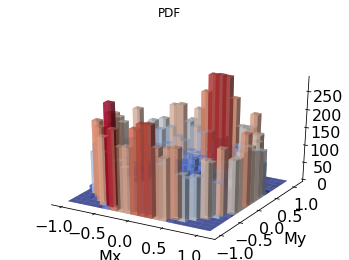

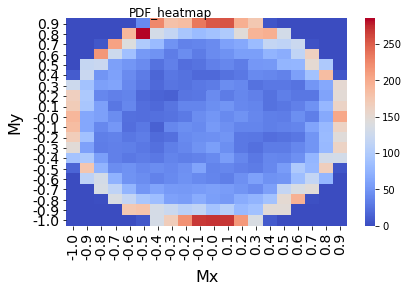

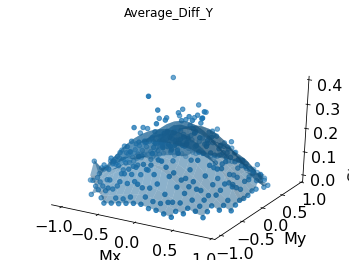

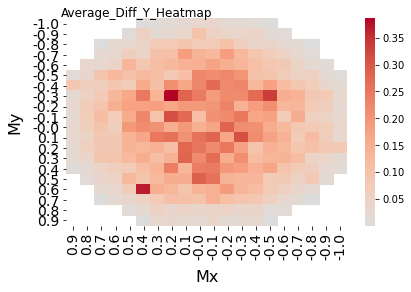

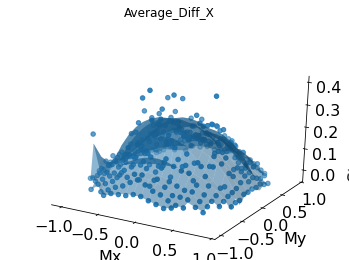

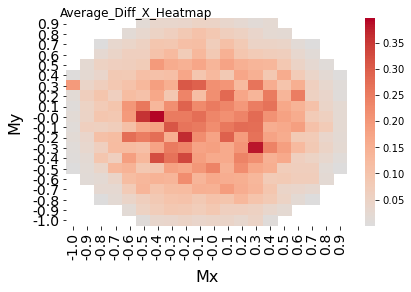

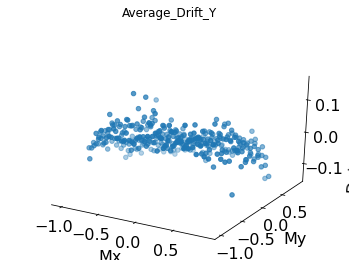

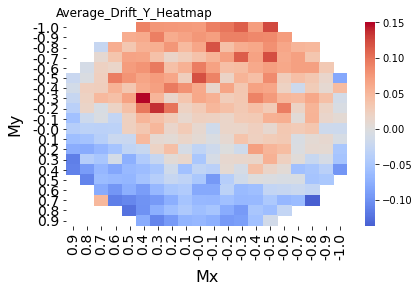

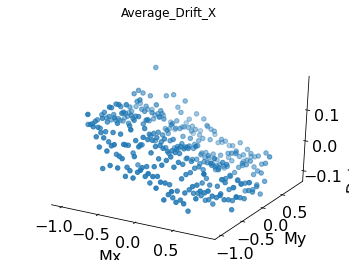

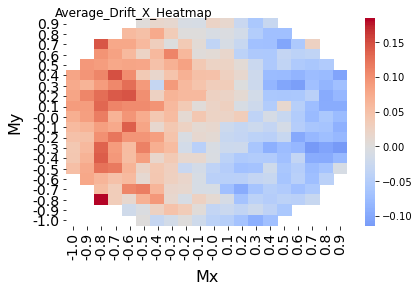

In [7]:
out.visualize(save=True)

# 2D Slice

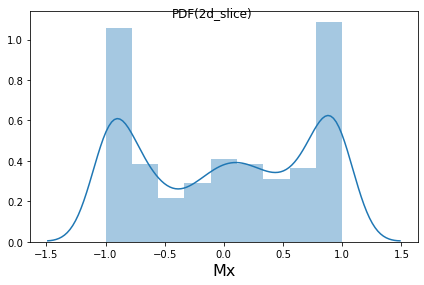

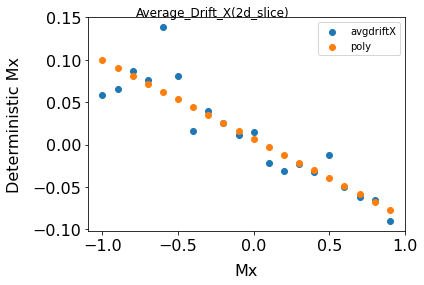

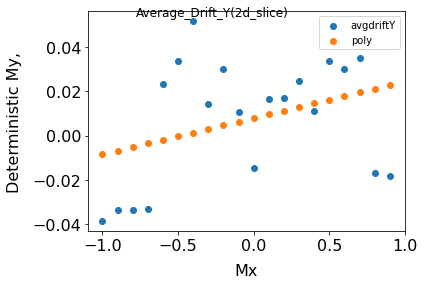

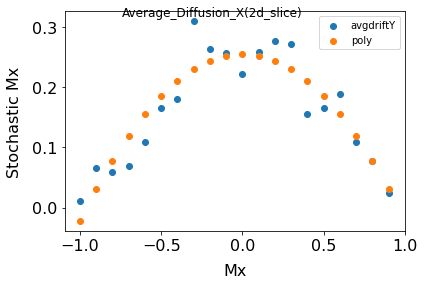

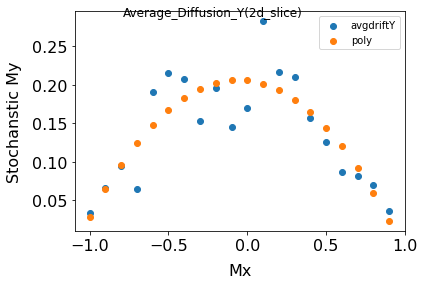

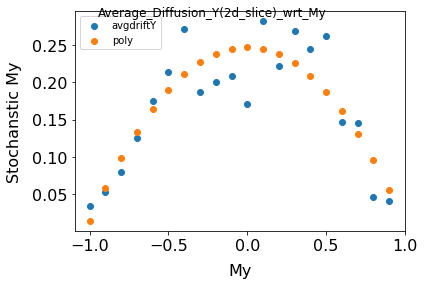

In [8]:
out.slices_2d(save=True)

# Diagnostics graphs

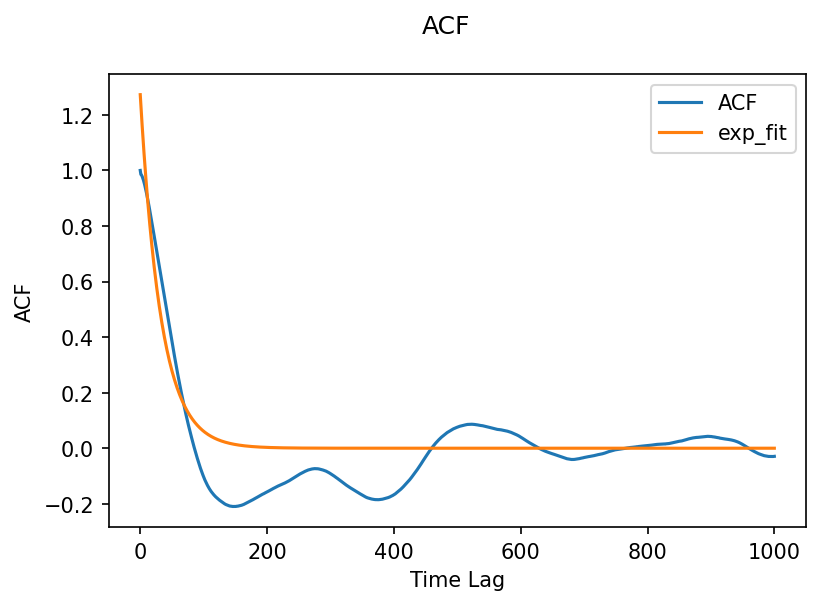

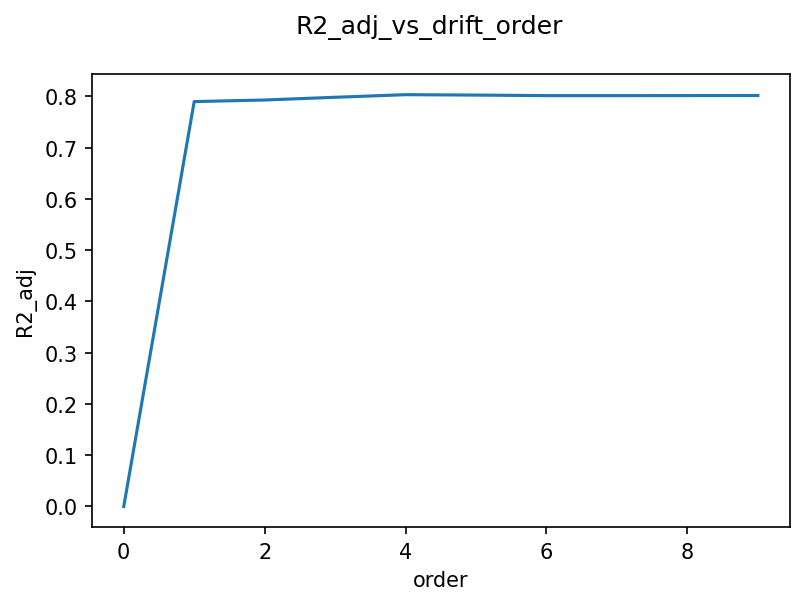

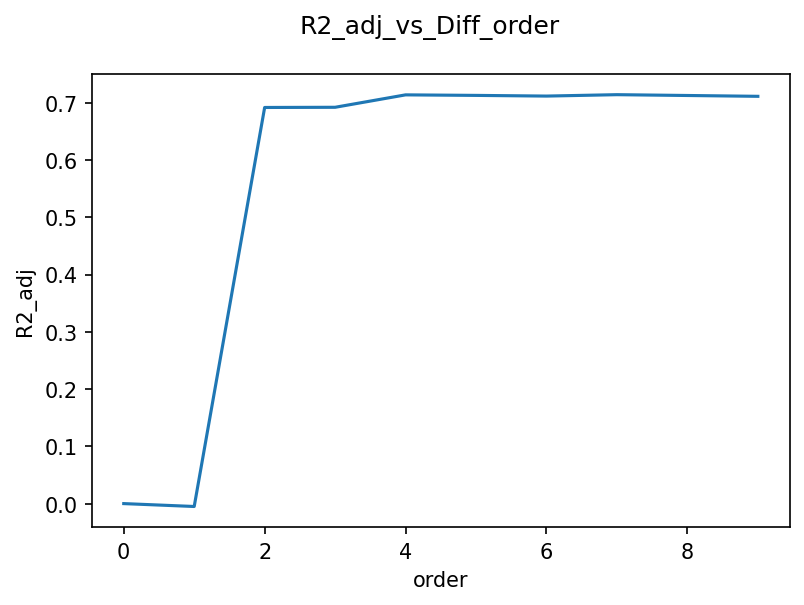

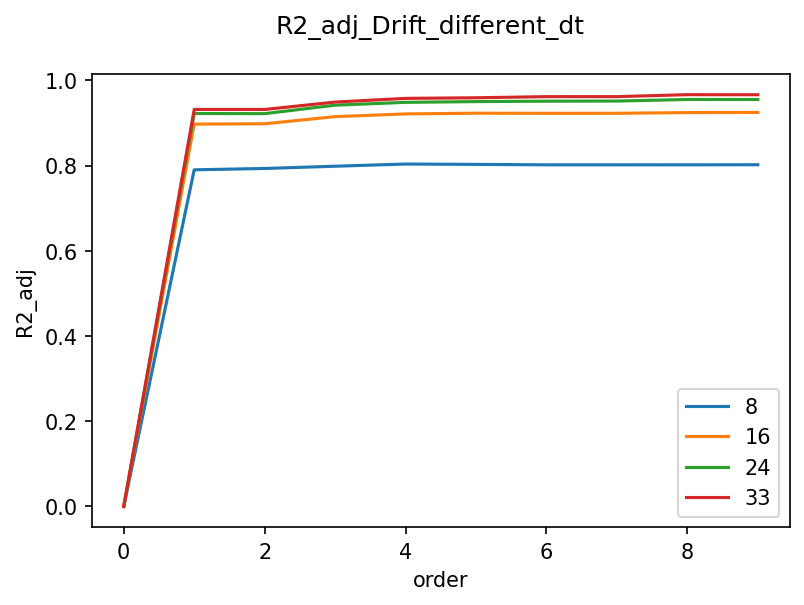

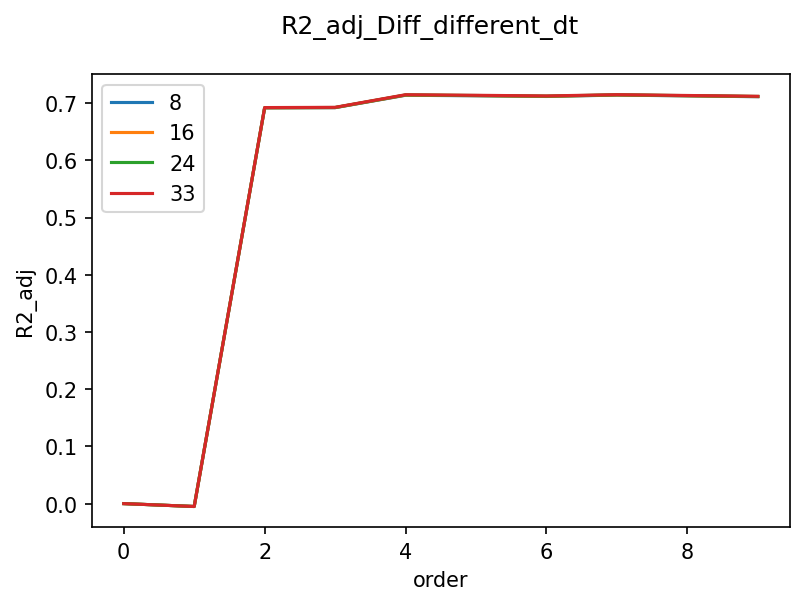

In [9]:
 out.diagnostic(save=True)

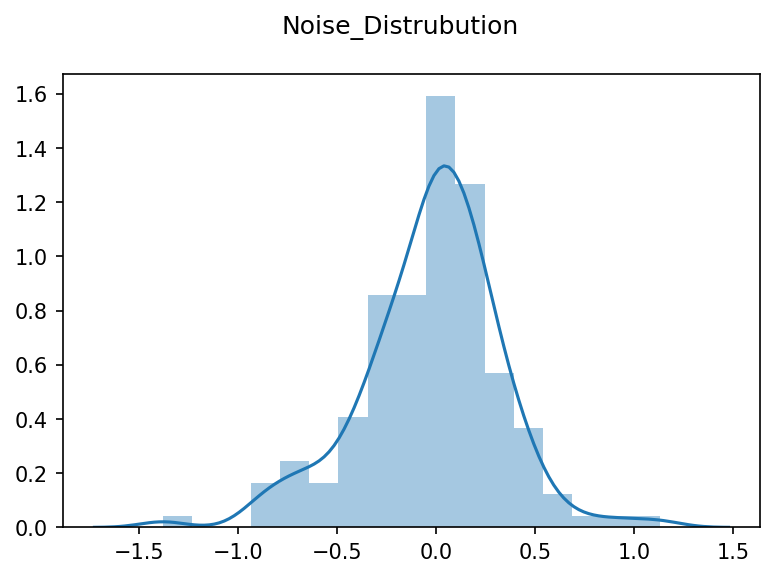

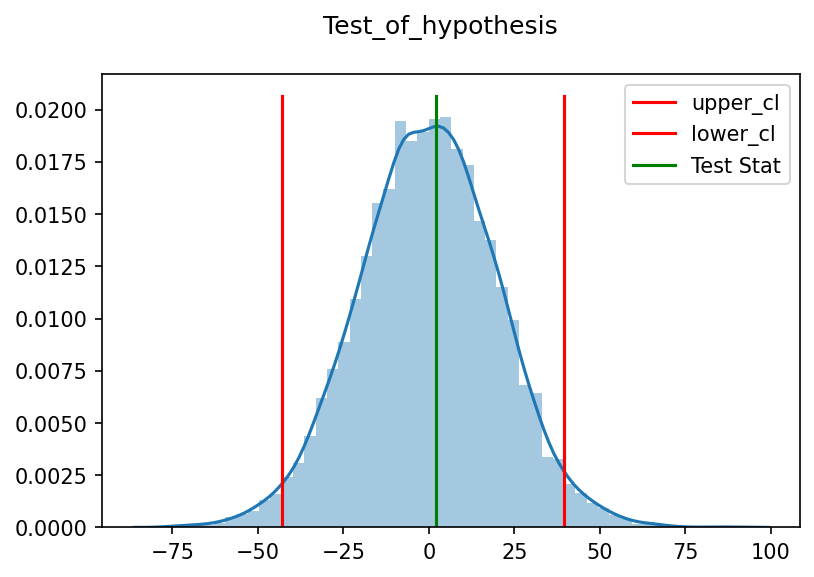

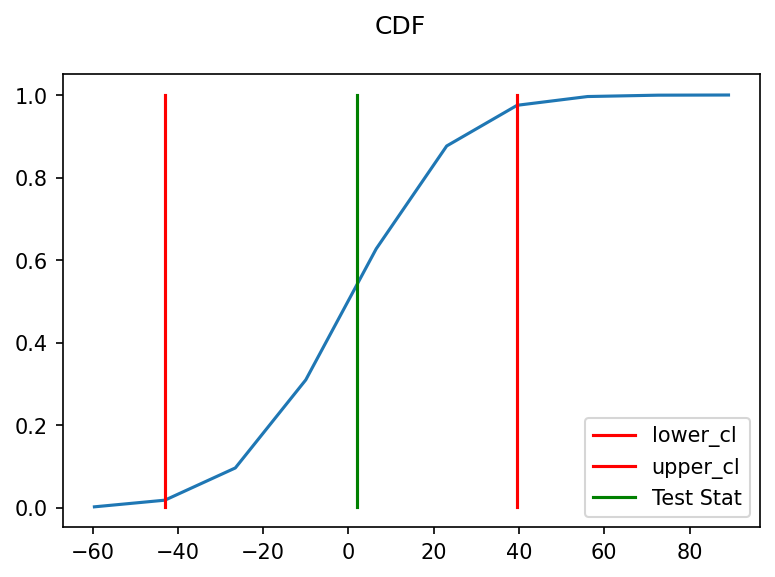

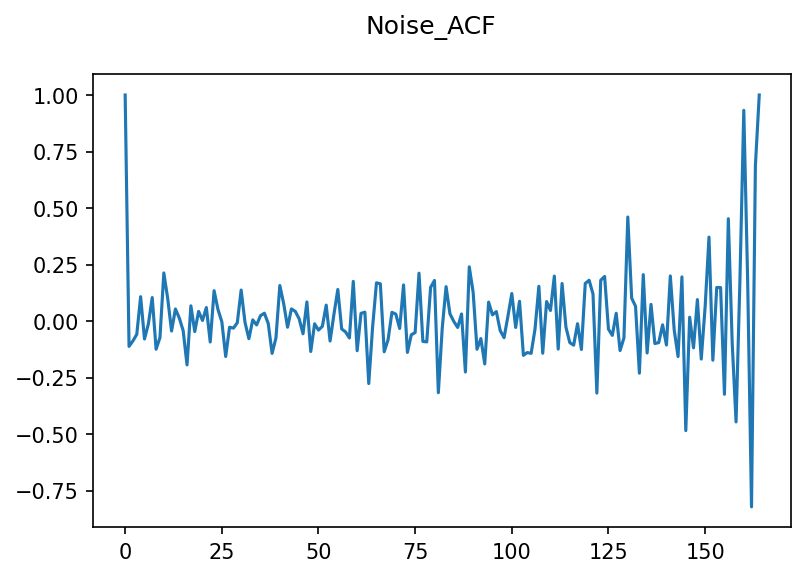

In [10]:
out.noise_characterstics(save=True)

In [11]:
out.save_data()